# Fire

Explore the problem in following stages:
1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 3. Feature Cleaning

During the EDA, we did complete some basic cleaning like converting the float date feature to datetime and extracted the month, day, and day of week. Now we will continue with the cleaning and adding features.

* Imputing the containment date (this has >30% missing values, but we want to keep it to calculate fore length)
* Calculating the fire duration (in days)
* dropping features with over 30% null values
* Dropping the Miscellaneous and Missing/Undefined fire causes

In [1]:
import pandas as pd

In [21]:
df = pd.read_csv("../../data/SQL/Fires.csv", index_col = 0) 

C:\Users\3_hal\AppData\Local\Temp\ipykernel_3792\2716397296.py:1: DtypeWarning: Columns (9,11,12,13,15,16,36,38,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../data/SQL/Fires.csv", index_col = 0)


In [6]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,DISC_GREG_DATE,CONT_GREG_DATE,DISC_MONTH,DISC_DAY,DISC_DAYOFWEEK
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,CA,63.0,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02,2005-02-02,2,2,2
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,CA,61.0,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,2004-05-12,5,12,2
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,CA,17.0,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31,2004-05-31,5,31,0
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-06-28,2004-07-03,6,28,0
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,CA,3.0,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-06-28,2004-07-03,6,28,0


In [17]:
df.shape

(284151, 44)

### Fire Duration Feature

In [31]:
#we can correlate fire size with burn length so we can impute the containment date
duration = df[['DISCOVERY_DOY', 'CONT_DOY','FIRE_SIZE_CLASS']]
duration.dropna(inplace=True)

C:\Users\3_hal\AppData\Local\Temp\ipykernel_3792\2297893737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration.dropna(inplace=True)


In [32]:
duration.dtypes

DISCOVERY_DOY        int64
CONT_DOY           float64
FIRE_SIZE_CLASS     object
dtype: object

In [33]:
duration['Fire_duration'] = duration['CONT_DOY'] - duration['DISCOVERY_DOY']

C:\Users\3_hal\AppData\Local\Temp\ipykernel_3792\2299038276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration['Fire_duration'] = duration['CONT_DOY'] - duration['DISCOVERY_DOY']


In [34]:
duration.head()

,DISCOVERY_DOY,CONT_DOY,FIRE_SIZE_CLASS,Fire_duration
0,33,33.0,A,0.0
1,133,133.0,A,0.0
2,152,152.0,A,0.0
3,180,185.0,A,5.0
4,180,185.0,A,5.0


In [35]:
duration.describe()

,DISCOVERY_DOY,CONT_DOY,Fire_duration
count,174022.000000,174022.000000,174022.000000
mean,207.507855,208.976440,1.468584
std,55.994966,56.472801,8.472870
min,1.000000,1.000000,-364.000000
25%,181.000000,182.000000,0.000000
50%,211.000000,212.000000,0.000000
75%,241.000000,243.000000,1.000000
max,366.000000,366.000000,335.000000


Looks like fires that started and ended in different years are causing some negative fire durations.

In [38]:
duration[duration['Fire_duration'] < 0]

,DISCOVERY_DOY,CONT_DOY,FIRE_SIZE_CLASS,Fire_duration
7937,217,7.0,G,-210.0
8275,364,3.0,A,-361.0
16757,301,300.0,A,-1.0
40026,365,1.0,D,-364.0
46196,365,8.0,E,-357.0
64355,365,2.0,E,-363.0
65943,365,2.0,D,-363.0
68480,343,1.0,A,-342.0
214230,283,180.0,A,-103.0
224562,365,1.0,A,-364.0


In [40]:
#lets just add 365 to these values
duration.loc[duration['Fire_duration'] < 0, 'Fire_duration'] = duration['Fire_duration'] + 365

In [42]:
#check
duration[duration['Fire_duration'] < 0]

,DISCOVERY_DOY,CONT_DOY,FIRE_SIZE_CLASS,Fire_duration


In [43]:
# mean fire duration by grouped size of fire
fireclass_mean = duration.groupby('FIRE_SIZE_CLASS')['Fire_duration'].mean()
fireclass_mean

FIRE_SIZE_CLASS
A     0.881918
B     1.461714
C     3.808609
D     7.288856
E     8.873436
F    15.489555
G    28.599721
Name: Fire_duration, dtype: float64

In [47]:
def fireMeanLength(x):
    '''
    Function that returns a fire length for a given fire size class
    x is a string A to G
    '''
    fire_classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    position = fire_classes.index(x)
    
    return pd.to_timedelta(fireclass_mean[position], unit='D')

In [48]:
df['FIRE_MEAN_DURATION'] = df['FIRE_SIZE_CLASS'].apply(lambda x: fireMeanLength(x))

In [57]:
df['CONT_GREG_DATE'] = pd.to_datetime(df['CONT_GREG_DATE'])

In [60]:
df['DISC_GREG_DATE'] = pd.to_datetime(df['DISC_GREG_DATE'])

In [61]:
df['CONT_GREG_DATE'].dtype, df['DISC_GREG_DATE'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

We will use the mean fire duration feature to impute the containment dates

In [62]:
# Filling all missing data in CONT_GREG_DATE with the calculated date
df['CONT_GREG_DATE'].fillna(value=(df['DISC_GREG_DATE'] + df['FIRE_MEAN_DURATION']), inplace=True)

# Calculating the burn length of fire
df['FIRE_DURATION'] = df['CONT_GREG_DATE'] - df['DISC_GREG_DATE']

In [66]:
# Changing the dtype of Fire_duration from dt to int
df['FIRE_DURATION'] = df['FIRE_DURATION'].dt.days

In [85]:
#we can now drop the mean duration
df.drop('FIRE_MEAN_DURATION', axis = 1, inplace = True)

#### Dropping Misc/unknown fire causes from target

In [68]:
df = df[~df['STAT_CAUSE_DESCR'].isin(['Miscellaneous', 'Missing/Undefined'])]

In [73]:
labels = df['STAT_CAUSE_DESCR'].unique()

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

             index  STAT_CAUSE_DESCR
0        Lightning             68250
1    Equipment Use             44958
2   Debris Burning             24800
3            Arson             22942
4         Campfire             20812
5          Smoking              9163
6         Children              9155
7        Powerline              1814
8        Fireworks              1781
9         Railroad              1299
10       Structure               325


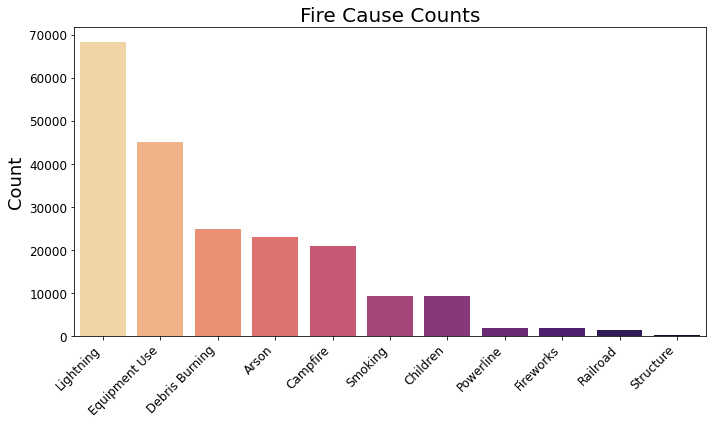

In [80]:
# Bar plot for class imbalance

cause_counts = pd.DataFrame(df['STAT_CAUSE_DESCR'].value_counts().reset_index(drop=False))
print(cause_counts)

plt.figure(figsize=(10,6))
sns.barplot(x='index', y='STAT_CAUSE_DESCR', data=cause_counts, palette='magma_r')
plt.title('Fire Cause Counts', size=20)
plt.xlabel('')
plt.xticks(rotation=45, size=12, horizontalalignment='right')
plt.ylabel('Count', size=18)
plt.yticks(size=12)
plt.tight_layout()
# plt.savefig./Figures/FireCausesCounts.pngpng', dpi=300)
plt.show()

### Dropping features with 30%+ null values

In [74]:
def drop_null_30(df):
    """
    drops all columns from input df with missing data of over 30%
    """
    percent_missing = round(df.isnull().sum() * 100 / len(df))
    missing_values = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
    
    cols_30 = missing_values[missing_values['percent_missing'] > 30].index
    df.drop(cols_30, inplace=True, axis = 1)
    return f'The following columns have been dropped: {cols_30}'

In [75]:
drop_null_30(df)

"The following columns have been dropped: Index(['LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE',\n       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',\n       'COMPLEX_NAME', 'DISCOVERY_TIME', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',\n       'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],\n      dtype='object')"

#### Save cleaned dataset to file

In [86]:
df.to_csv('../../data/SQL/fires_clean.csv') 